**The Problem Statement**
The problem statement for this dataset could be to identify distinct groups of individuals based on their behaviors, intentions, attitudes, norms, perceptions, motivations, social support, and empowerment related to cervical cancer. By applying K-means clustering, we can gain insights into the different profiles or segments of individuals and potentially uncover factors that contribute to the risk or prevention of cervical cancer.

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/sobar_cervical_cancer72 - sobar_cervical_cancer72.csv")

**DATA DESCRIPTION**

In [ ]:
df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,cervical_cancer
0,10,13.0,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11.0,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15.0,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11.0,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11.0,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   behavior_sexualRisk         72 non-null     int64  
 1   behavior_eating             68 non-null     float64
 2   behavior_personalHygine     72 non-null     int64  
 3   intention_aggregation       72 non-null     int64  
 4   intention_commitment        72 non-null     int64  
 5   attitude_consistency        72 non-null     int64  
 6   attitude_spontaneity        72 non-null     int64  
 7   norm_significantPerson      72 non-null     int64  
 8   norm_fulfillment            72 non-null     int64  
 9   perception_vulnerability    72 non-null     int64  
 10  perception_severity         72 non-null     int64  
 11  motivation_strength         72 non-null     int64  
 12  motivation_willingness      72 non-null     int64  
 13  socialSupport_emotionality  72 non-nu

In [ ]:
df.shape

(72, 20)

In [ ]:
df.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,cervical_cancer
count,72.000000,68.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.661765,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.366497,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


**CHECKING NULL VALUES**

In [ ]:
df.isnull().sum()

behavior_sexualRisk           0
behavior_eating               4
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
cervical_cancer               0
dtype: int64

**IMPUTING NULL VALUES**

In [ ]:
mean = df["behavior_eating"].mean()

In [ ]:
df["behavior_eating"] = df["behavior_eating"].fillna(mean)

In [ ]:
df.isnull().sum()

behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
cervical_cancer               0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

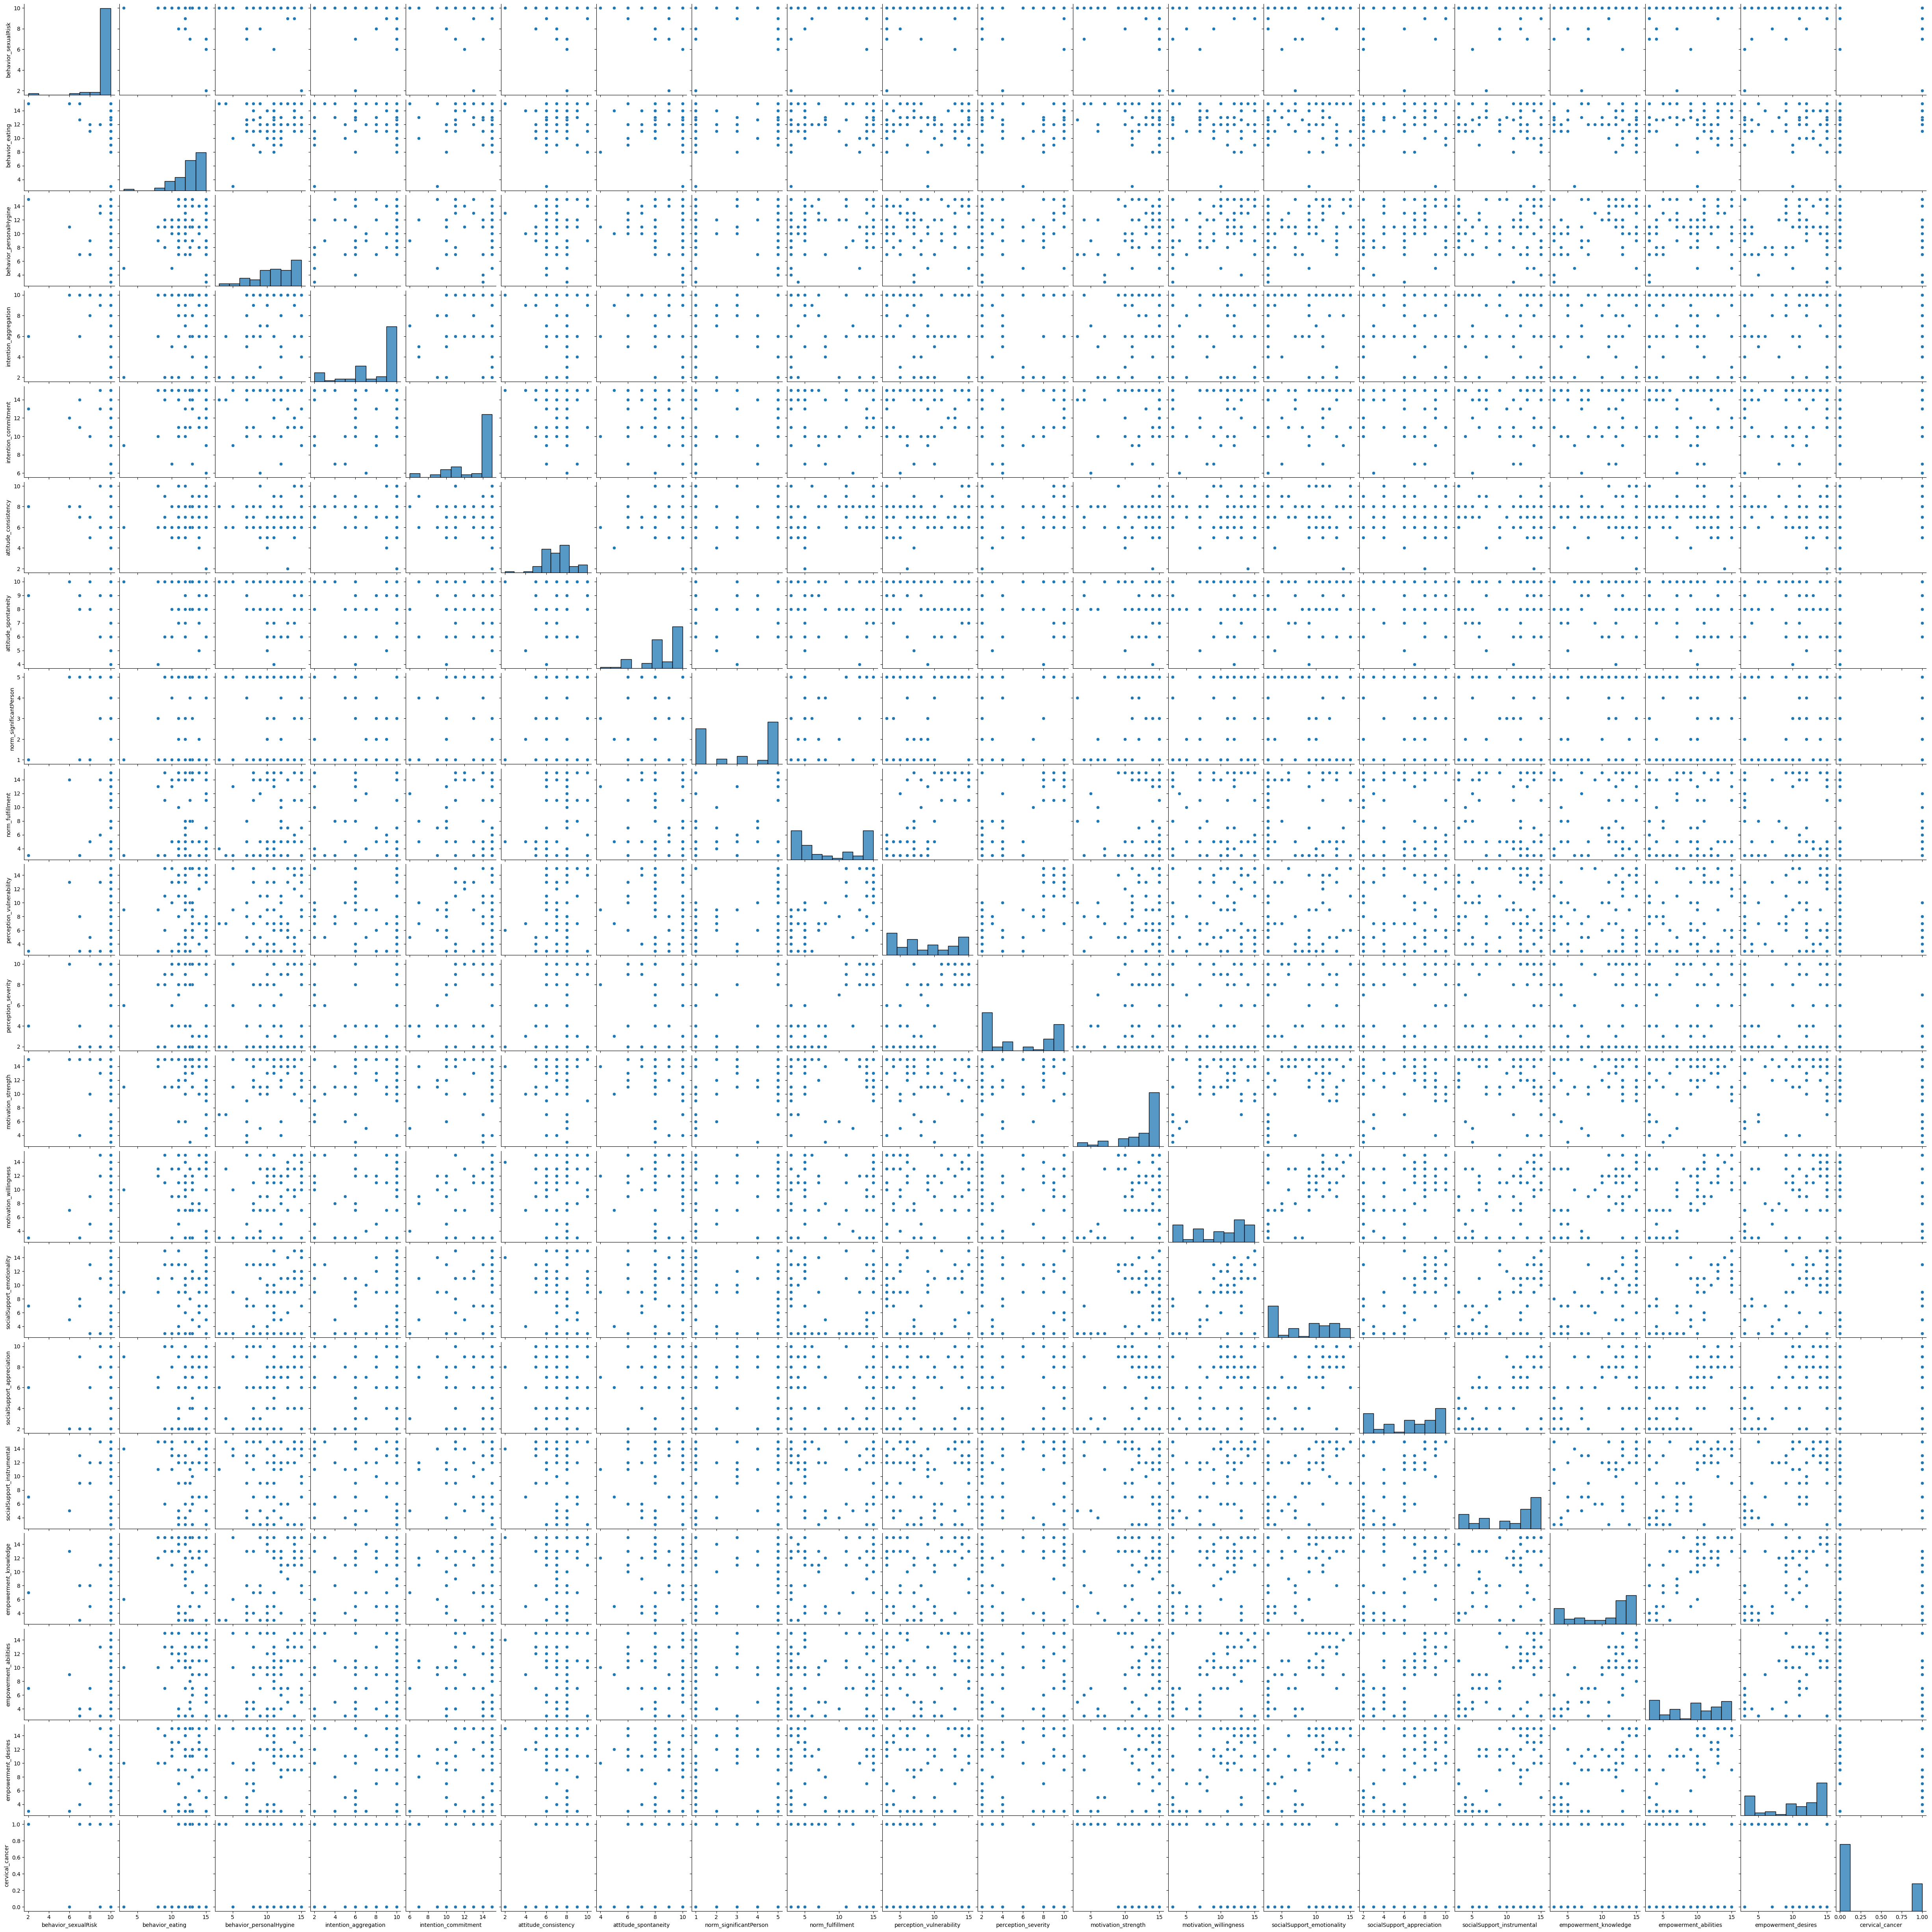

In [ ]:
plt.figure(figsize=(16,5))
sns.pairplot(df)

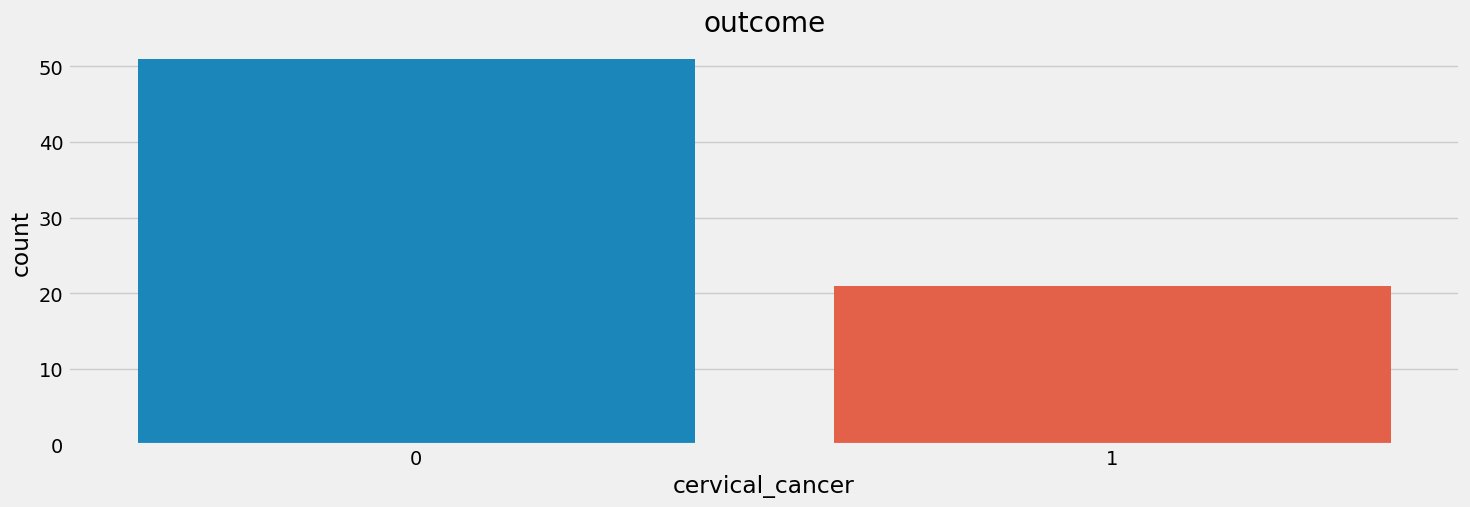

In [ ]:
plt.style.use('fivethirtyeight')
sns.countplot(x="cervical_cancer",data=df)
plt.title("outcome")
plt.show()

<Axes: >

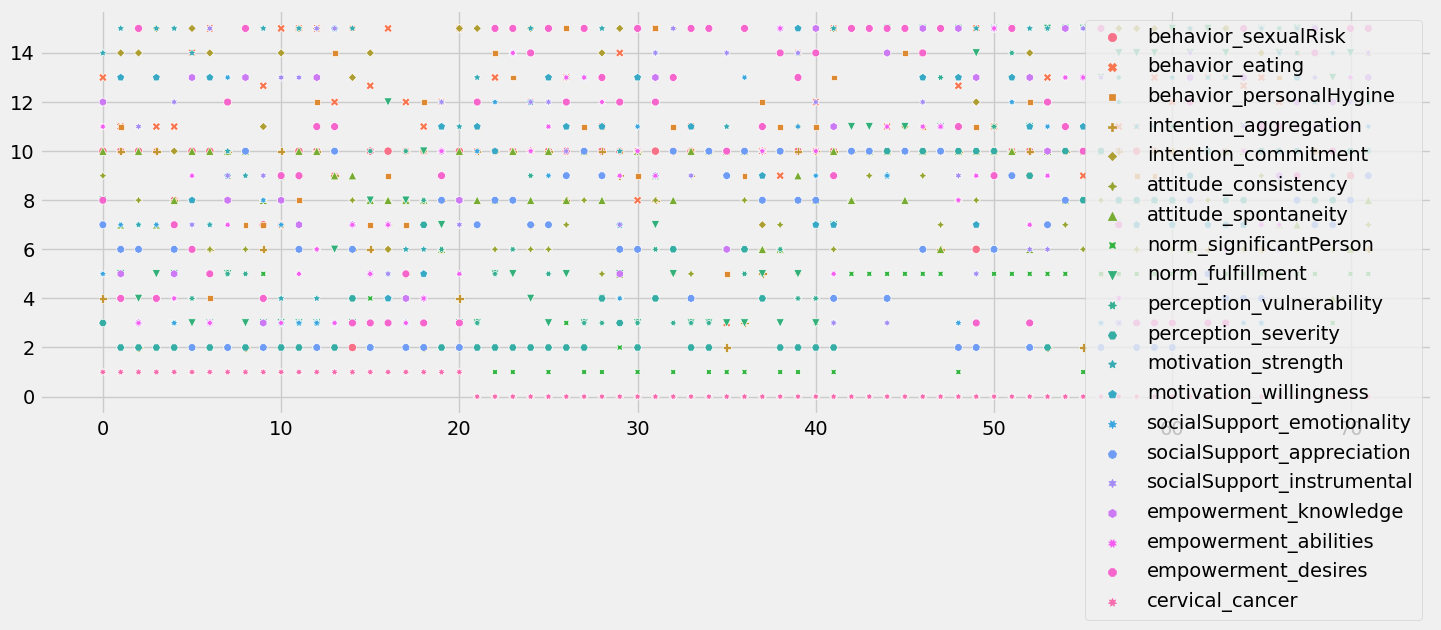

In [ ]:
plt.figure(figsize=(16,5))
sns.scatterplot(data = df)

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


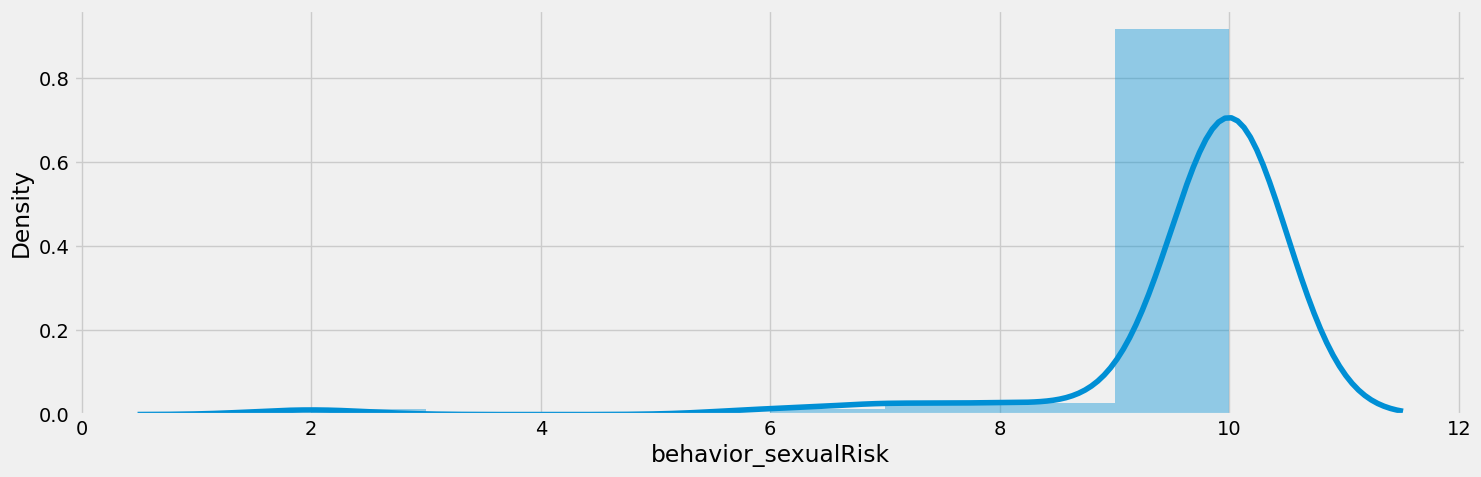

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


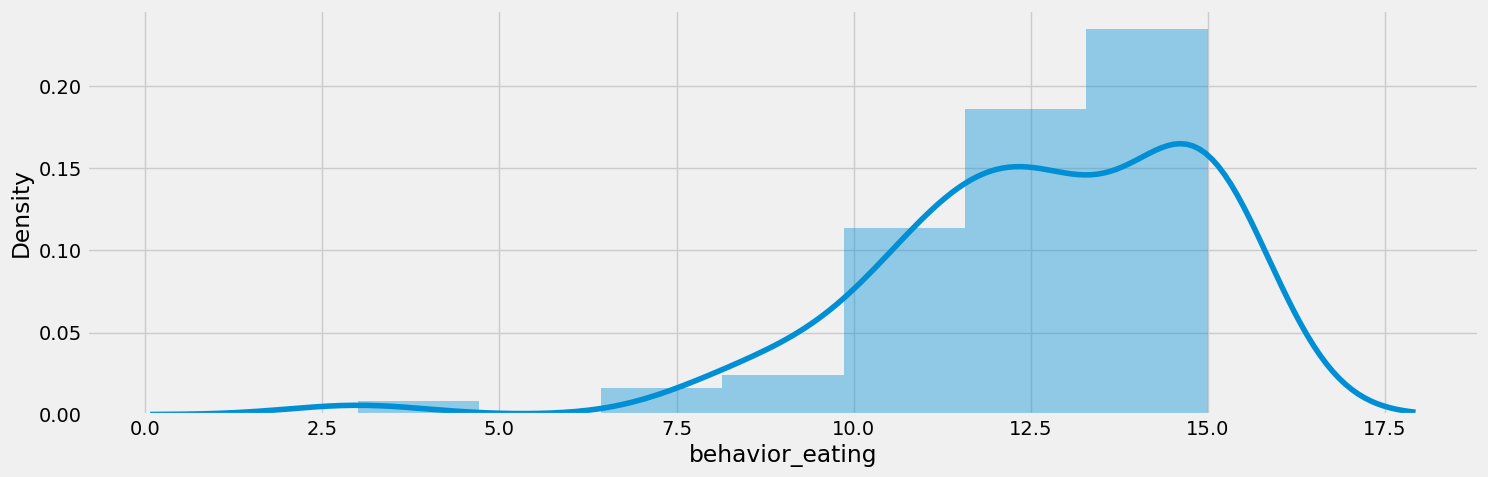

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


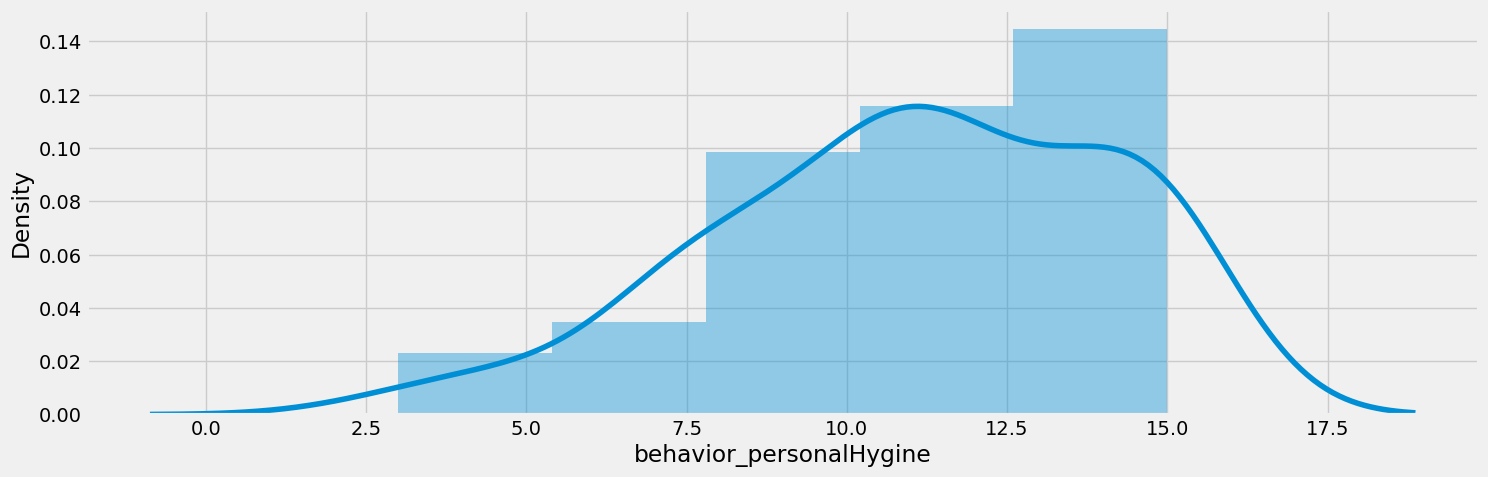

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


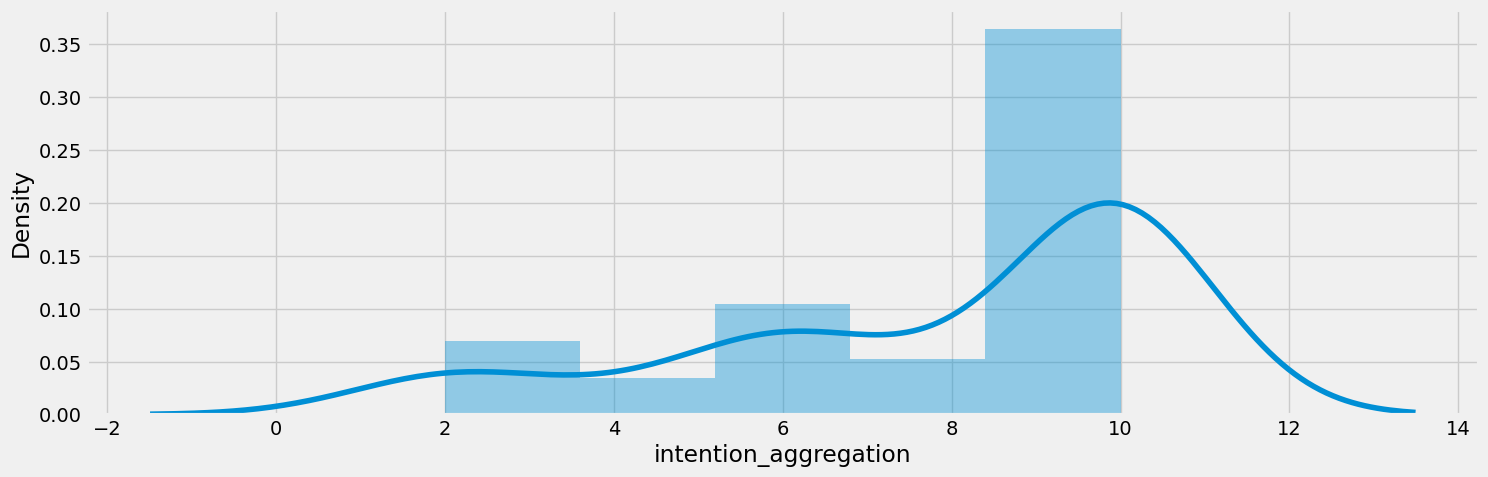

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


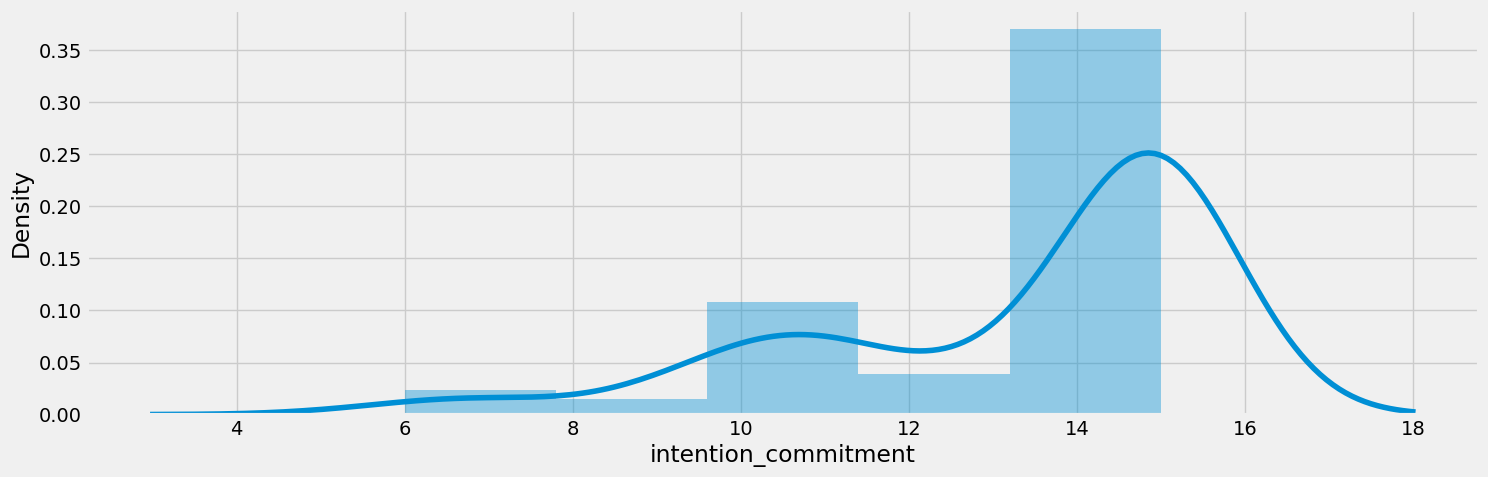

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


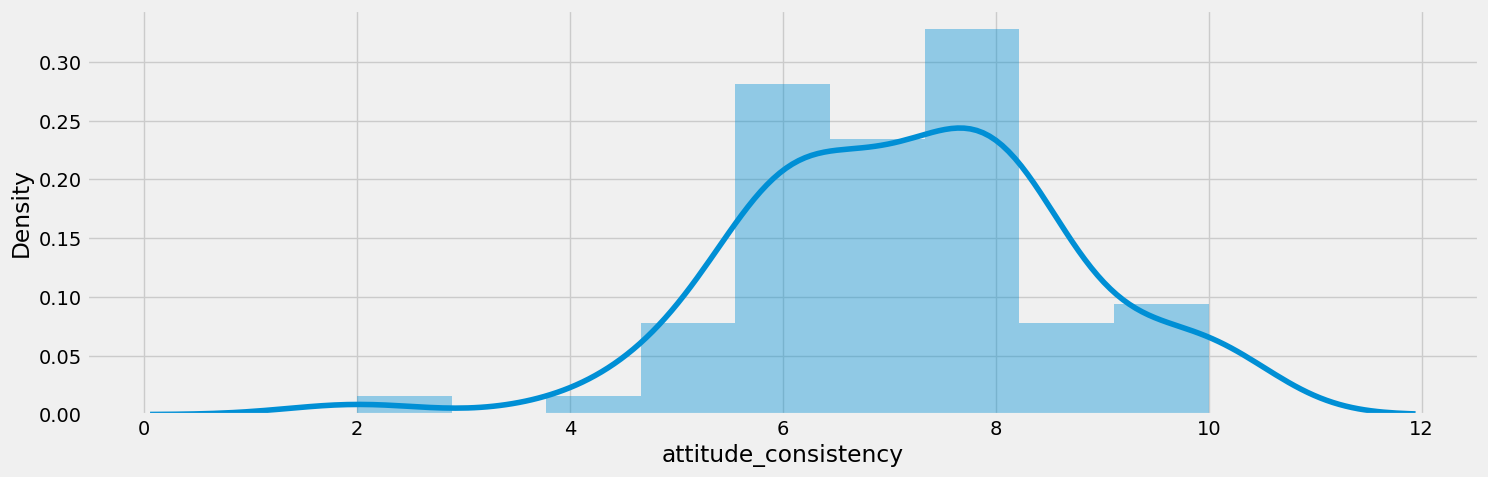

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


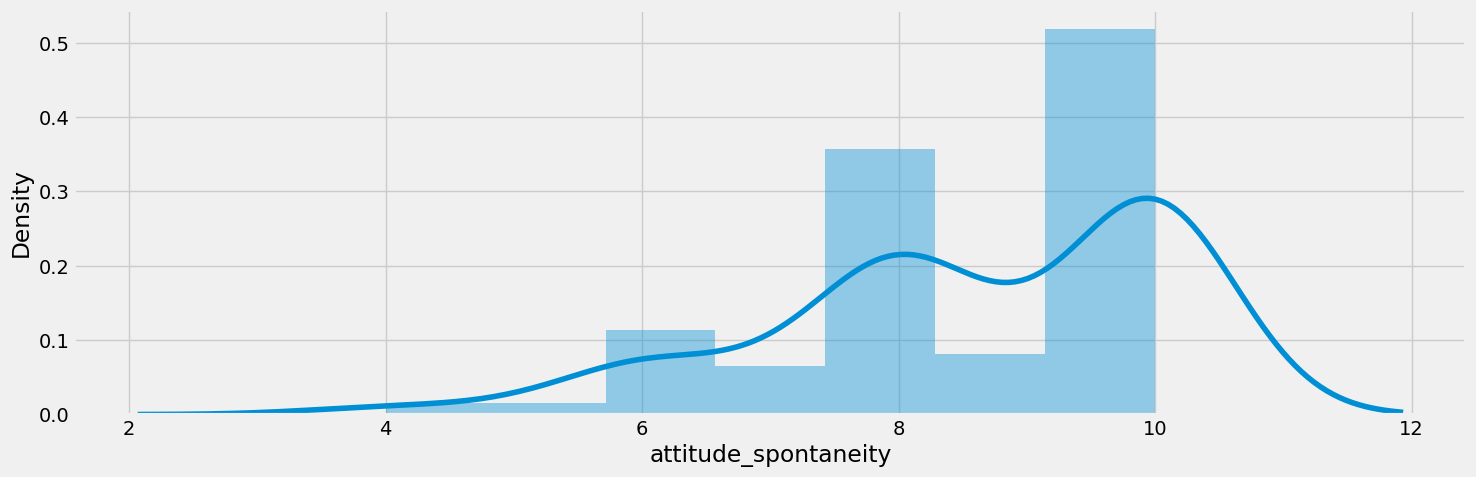

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


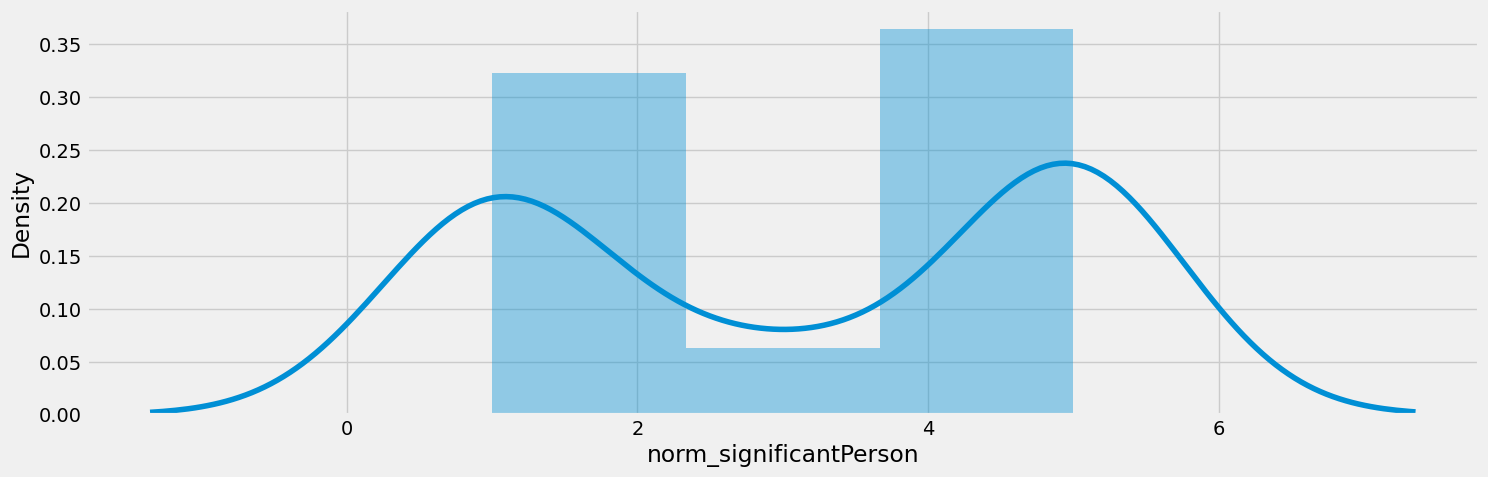

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


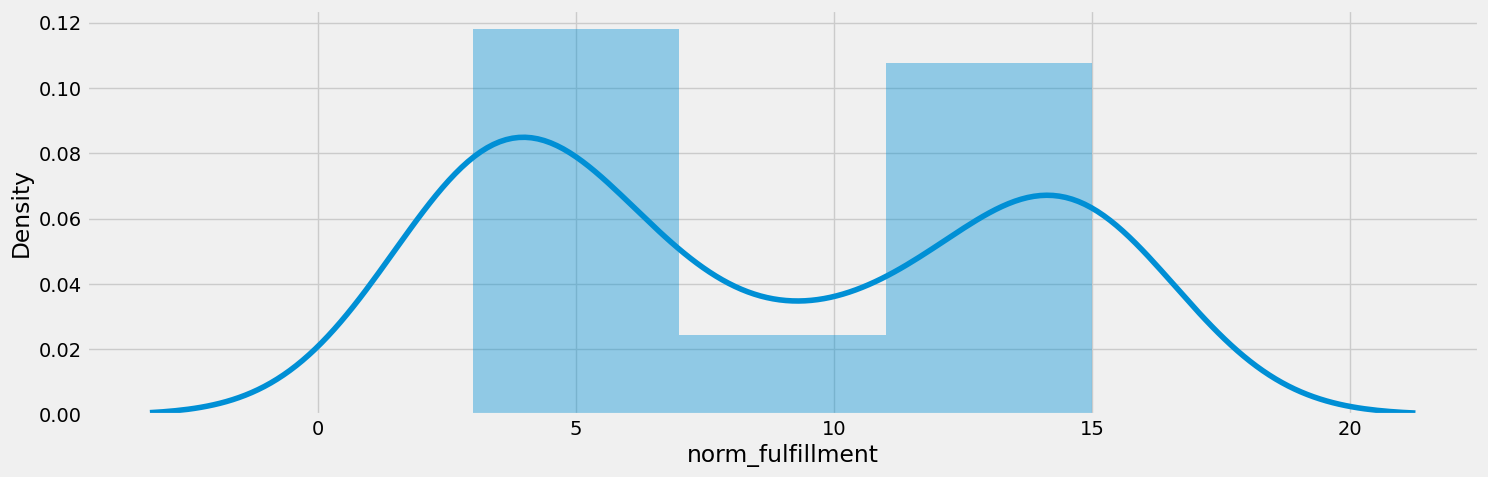

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


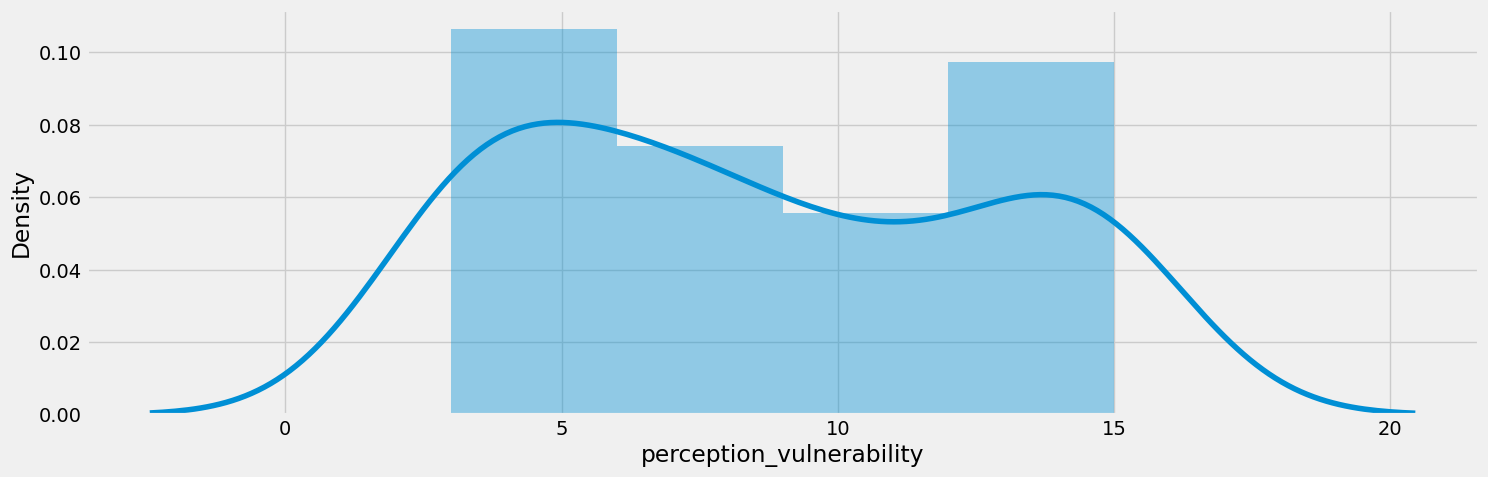

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


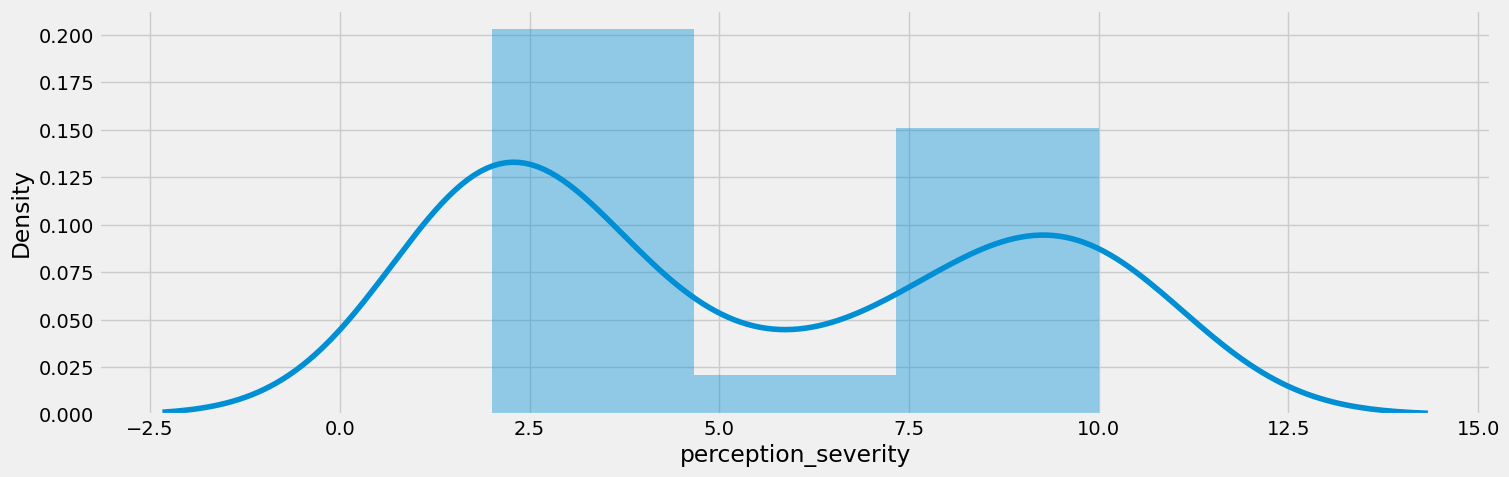

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


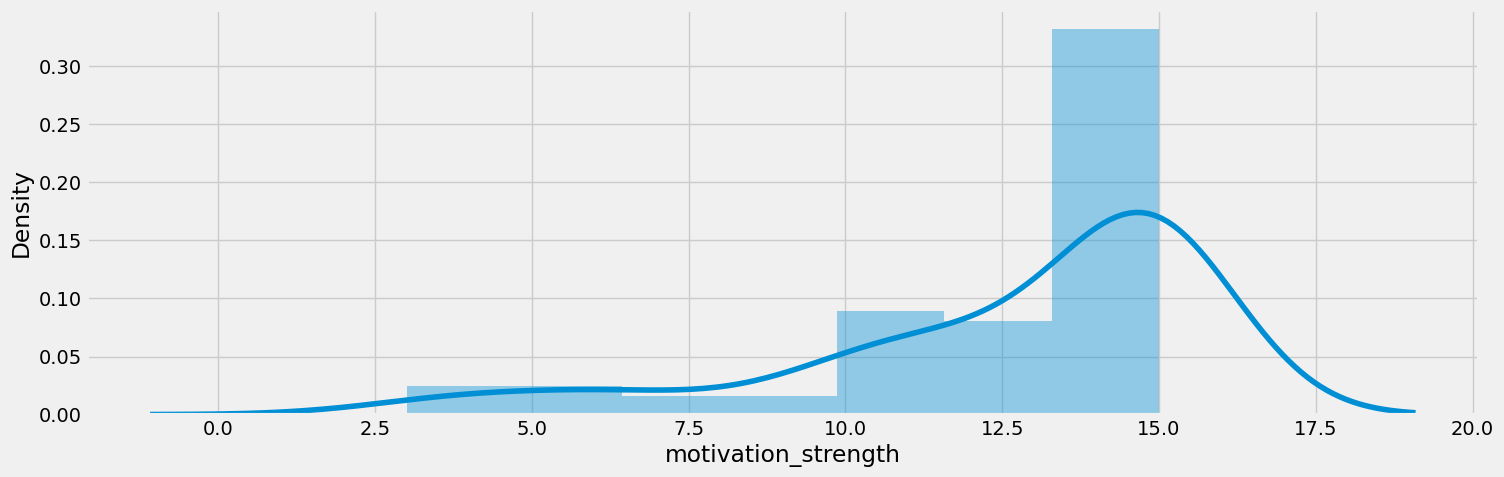

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


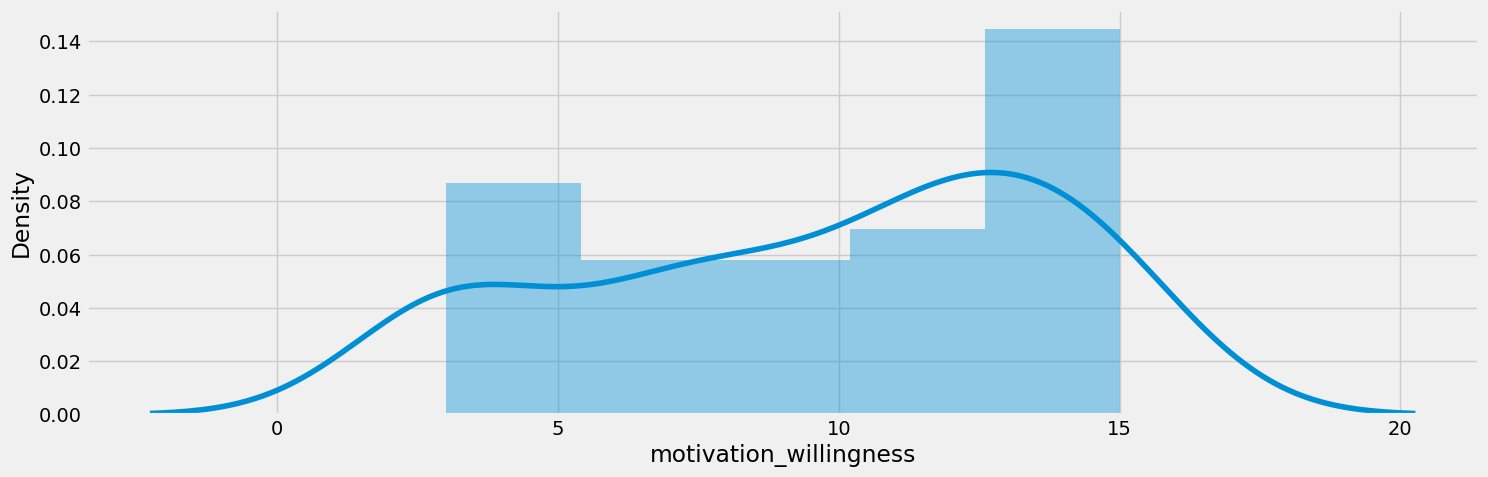

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


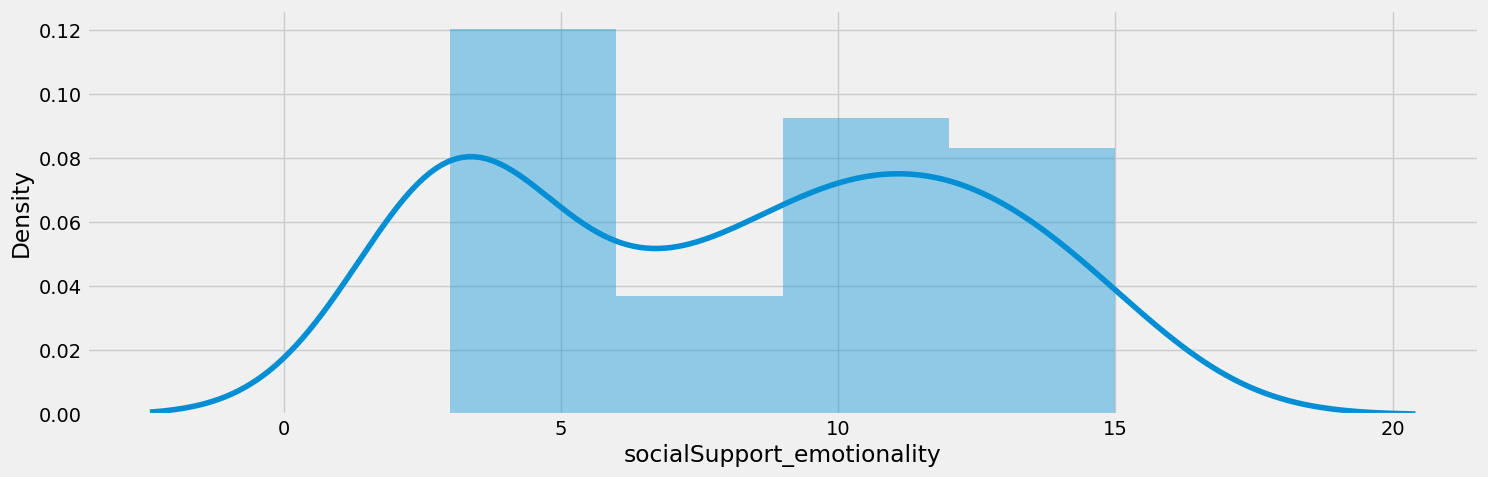

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


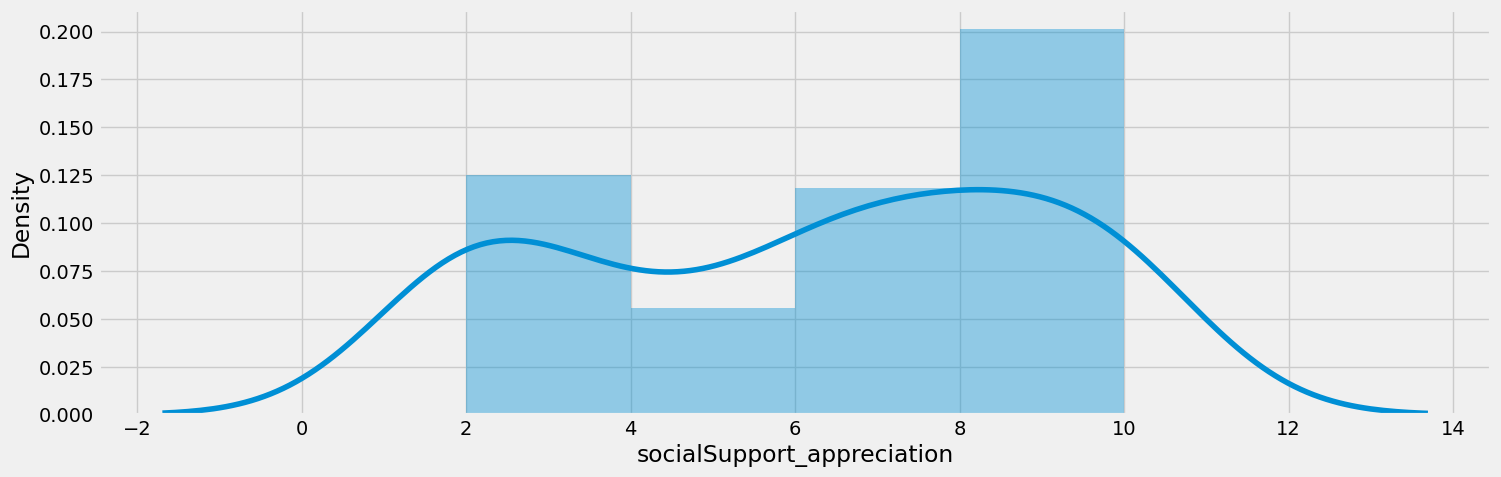

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


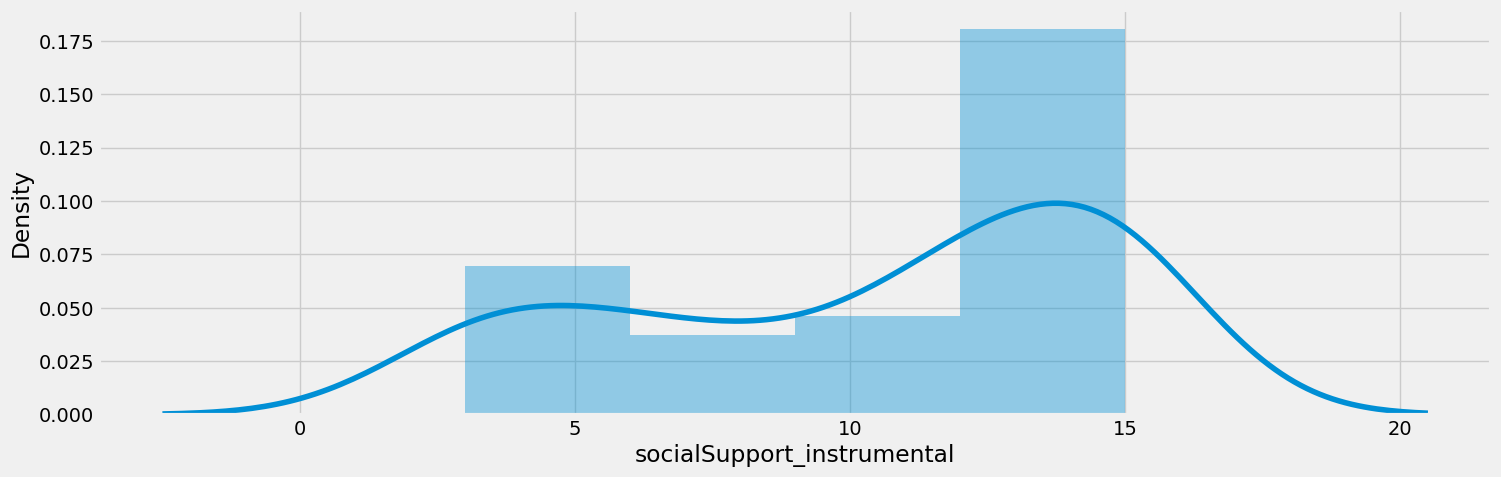

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


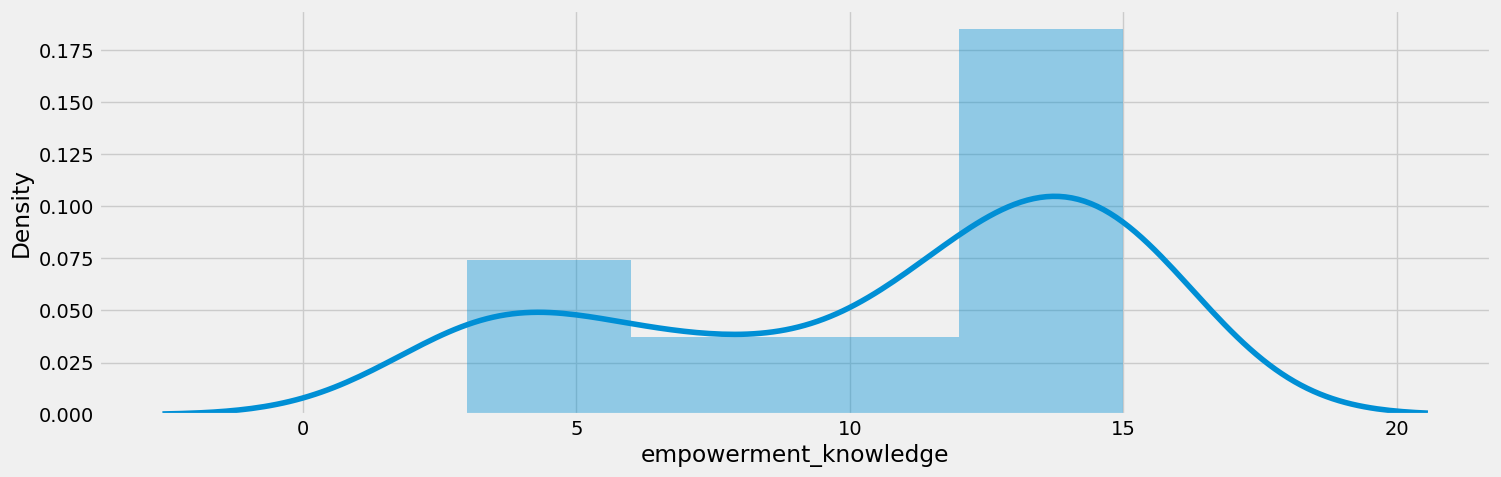

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


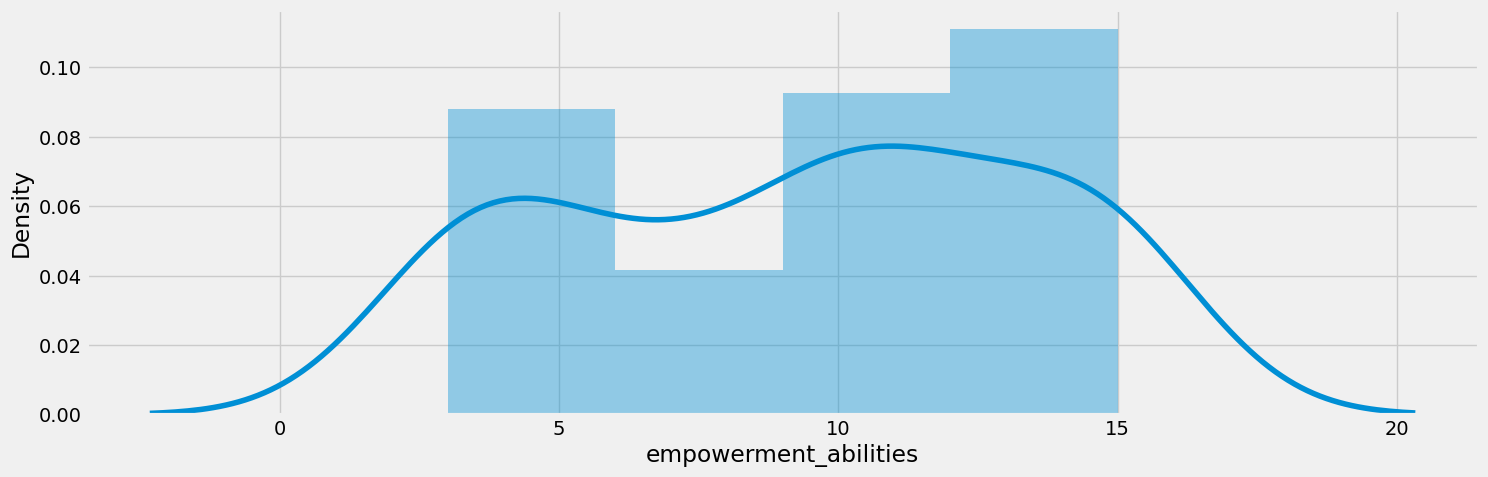

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


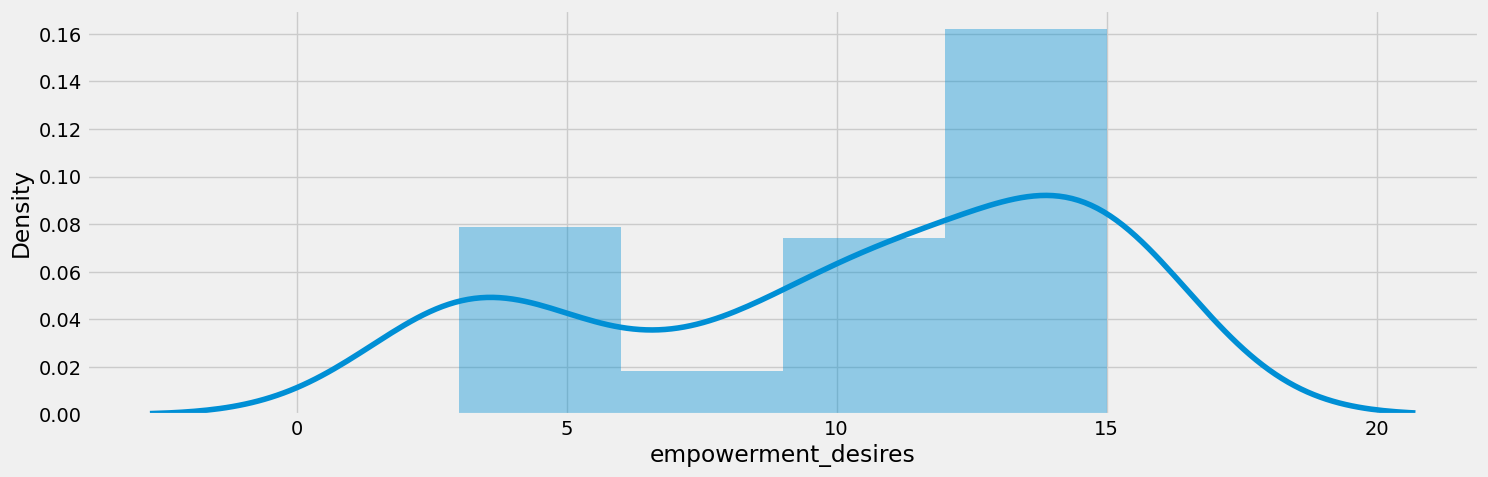

<ipython-input-16-fb3d9f414c33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


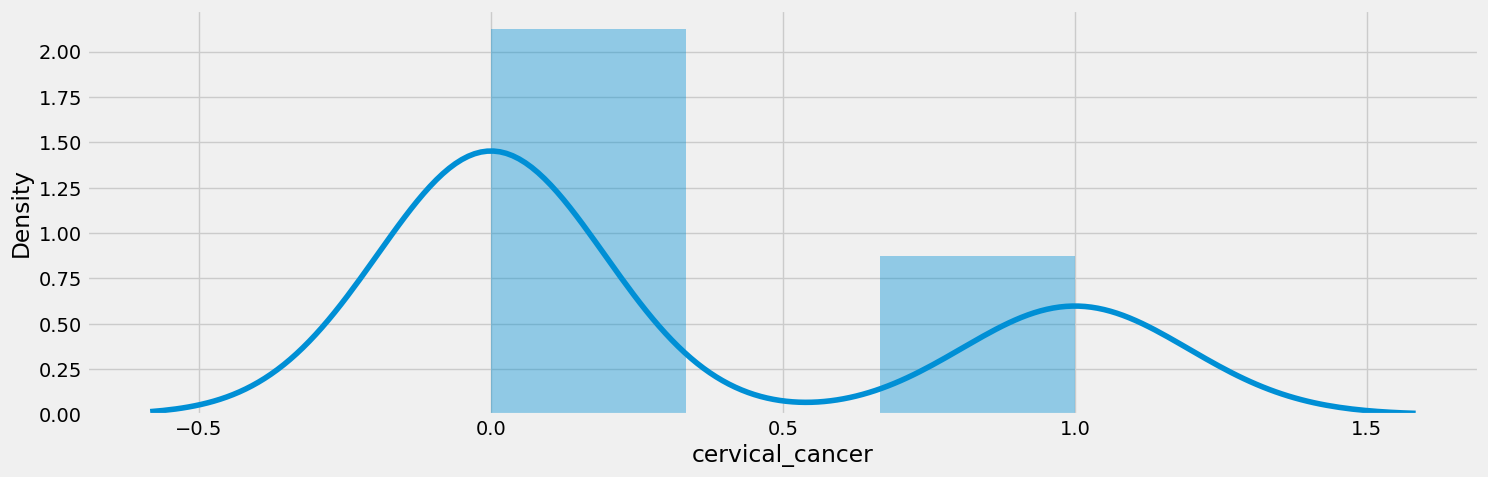

In [ ]:
for feature in df.columns:
    plt.figure(figsize=(16,5))
    sns.distplot(df[feature])
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   behavior_sexualRisk         72 non-null     int64  
 1   behavior_eating             72 non-null     float64
 2   behavior_personalHygine     72 non-null     int64  
 3   intention_aggregation       72 non-null     int64  
 4   intention_commitment        72 non-null     int64  
 5   attitude_consistency        72 non-null     int64  
 6   attitude_spontaneity        72 non-null     int64  
 7   norm_significantPerson      72 non-null     int64  
 8   norm_fulfillment            72 non-null     int64  
 9   perception_vulnerability    72 non-null     int64  
 10  perception_severity         72 non-null     int64  
 11  motivation_strength         72 non-null     int64  
 12  motivation_willingness      72 non-null     int64  
 13  socialSupport_emotionality  72 non-nu

**UPSAMPLING**

In [ ]:
x = df.drop(["cervical_cancer"],axis=1)
y = df["cervical_cancer"]

In [ ]:
#importing SMOTE
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)

In [ ]:
#checking the oversampling output
y1=pd.DataFrame(yo)
y1.value_counts()

cervical_cancer
0                  51
1                  51
dtype: int64

<Axes: xlabel='cervical_cancer', ylabel='count'>

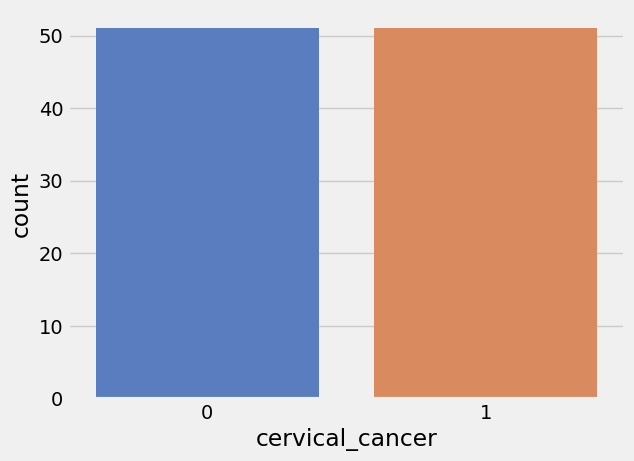

In [ ]:
#plotting count plot using seaborn
sns.countplot(x = yo, palette='muted')

**CLUSTERING**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
cols = df.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(df)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

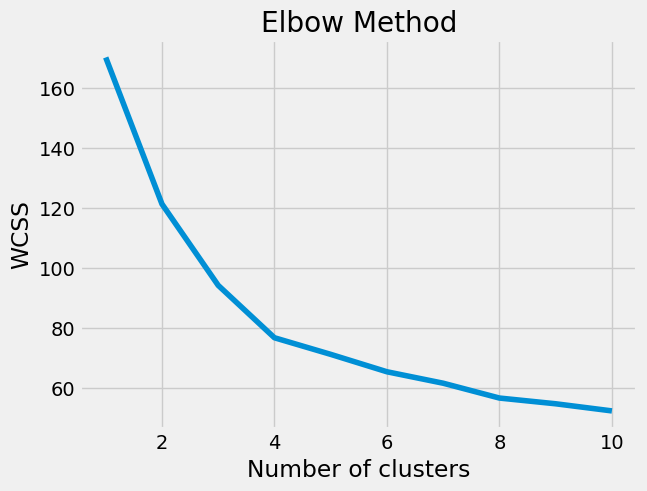

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
n_clusters=9
clusterer = KMeans(n_clusters, random_state =10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 4 5 5 5 5 4 4 1 4 5 5 5 1 5 7 7 7 7 1 4 2 2 2 2 2 2 2 2 5 2 2 2 2 2 8 2
 2 2 2 2 5 3 3 0 3 0 3 0 6 3 3 6 0 3 8 0 6 6 6 6 3 6 6 0 0 0 3 3 3 3 3]


In [ ]:
kmeans.cluster_centers_

array([[1.00000000e+00, 7.65756303e-01, 6.19047619e-01, 7.14285714e-01,
        8.57142857e-01, 7.67857143e-01, 9.28571429e-01, 8.57142857e-01,
        9.16666667e-01, 9.88095238e-01, 9.46428571e-01, 9.88095238e-01,
        4.40476190e-01, 1.42857143e-01, 2.50000000e-01, 4.76190476e-01,
        7.97619048e-01, 5.71428571e-01, 8.45238095e-01, 0.00000000e+00,
        2.50000000e-01],
       [1.00000000e+00, 7.91666667e-01, 7.66666667e-01, 1.00000000e+00,
        9.44444444e-01, 5.50000000e-01, 8.16666667e-01, 0.00000000e+00,
        7.50000000e-02, 9.16666667e-02, 7.50000000e-02, 9.83333333e-01,
        8.08333333e-01, 7.58333333e-01, 8.25000000e-01, 9.41666667e-01,
        9.50000000e-01, 8.41666667e-01, 9.41666667e-01, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 8.05453431e-01, 4.79166667e-01, 3.75000000e-01,
        4.44444444e-01, 7.50000000e-01, 6.66666667e-01, 2.50000000e-01,
        5.41666667e-01, 4.37500000e-01, 2.81250000e-01, 1.66666667e-01,
        6.2500

In [ ]:
df['Cluster']= cluster_labels

In [ ]:
df["Cluster"].value_counts()

2    18
3    13
5    10
0     8
6     8
4     5
1     4
7     4
8     2
Name: Cluster, dtype: int64

In [ ]:
y_kmeans = kmeans.predict(X)
kmeans.labels_

array([8, 8, 9, 8, 8, 9, 5, 5, 6, 5, 9, 9, 9, 8, 8, 2, 2, 2, 2, 8, 5, 6,
       1, 1, 6, 1, 6, 1, 1, 9, 1, 6, 1, 6, 1, 7, 6, 6, 1, 1, 6, 9, 4, 4,
       0, 4, 0, 4, 0, 3, 4, 4, 3, 6, 4, 7, 0, 3, 3, 3, 3, 4, 3, 3, 0, 0,
       0, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
# Validation
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X,y_kmeans)
print("For n_clusters =", 3, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.20637275569724148


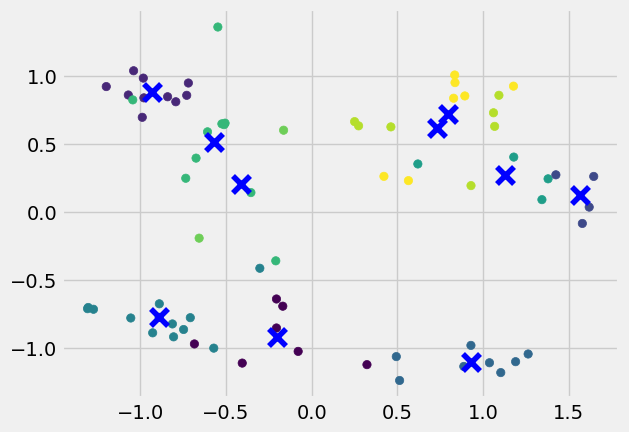

In [ ]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(X)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmeans.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

**Split data into separate training and test set **

In [ ]:
#xo = xo.drop(["Cluster"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xo, yo, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [ ]:
# check data types in X_train
X_train.dtypes

behavior_sexualRisk             int64
behavior_eating               float64
behavior_personalHygine         int64
intention_aggregation           int64
intention_commitment            int64
attitude_consistency            int64
attitude_spontaneity            int64
norm_significantPerson          int64
norm_fulfillment                int64
perception_vulnerability        int64
perception_severity             int64
motivation_strength             int64
motivation_willingness          int64
socialSupport_emotionality      int64
socialSupport_appreciation      int64
socialSupport_instrumental      int64
empowerment_knowledge           int64
empowerment_abilities           int64
empowerment_desires             int64
dtype: object

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires
0,0.383192,0.079052,0.241900,-0.513458,0.933328,0.564333,1.100756,1.238338,1.708326,-0.158463,1.654636,0.236236,-0.281601,-0.962169,-0.156450,-1.585820,-1.321906,-1.184853,-1.232757
1,0.383192,-0.868640,-0.079311,0.998910,0.933328,-0.197516,-0.972761,-1.028450,-0.505665,-0.928593,-0.833076,0.799035,1.129307,0.059938,-0.518519,-1.341616,-1.096960,-0.940647,-1.011842
2,0.383192,0.221004,-0.400523,-0.513458,-0.023629,0.564333,-0.281589,-1.028450,-0.727064,-0.928593,-0.833076,0.236236,0.188702,0.059938,-0.518519,-0.364799,0.477664,0.280385,-0.349099
3,0.383192,1.026745,1.205533,0.998910,-0.980585,2.088031,-0.281589,1.238338,0.822730,1.895216,1.654636,0.799035,1.599610,2.104153,1.653897,1.344631,1.377448,1.745624,1.418216
4,0.383192,-0.081219,0.241900,0.998910,0.933328,0.564333,1.100756,-1.028450,1.708326,1.895216,1.654636,0.799035,1.129307,-0.962169,-1.242657,-0.120595,1.377448,0.036179,0.534558


**Fit K Neighbours Classifier to the training set**

In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

**Predict test-set results **

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

**Check accuracy score**

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9048


In [ ]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[11  0]
 [ 2  8]]

True Positives(TP) =  11

True Negatives(TN) =  8

False Positives(FP) =  0

False Negatives(FN) =  2


**Compare the train-set and test-set accuracy**
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = knn.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9383


**Check for overfitting and underfitting**

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))


Training set score: 0.9383
Test set score: 0.9048


**INFERENCE:** The dataset have fitted the model very well by choosing 7 neighbours.



In [ ]:
from sklearn import preprocessing
#Normalizing the data
X_normalized = preprocessing.normalize(df[df.columns[:]], norm='l2')

In [ ]:
for i in range(6):
    pca = PCA(n_components=i)
    pca_result = pca.fit_transform(X_normalized)
    print (i,"explained variance : ",sum(pca.explained_variance_.round(2)), "|","explained variance ratio : ",sum(pca.explained_variance_ratio_.round(2)))
    print ('')

0 explained variance :  0 | explained variance ratio :  0

1 explained variance :  0.04 | explained variance ratio :  0.36

2 explained variance :  0.06 | explained variance ratio :  0.55

3 explained variance :  0.06999999999999999 | explained variance ratio :  0.65

4 explained variance :  0.07999999999999999 | explained variance ratio :  0.71

5 explained variance :  0.08999999999999998 | explained variance ratio :  0.76



**INFERENCE:** here chossing 5 components because it is giving the best explained variance ratio.

**Using PCA for reducing the datasize.**

In [ ]:
pca = PCA(n_components = 5)
pca_result = pca.fit_transform(X_normalized)

In [ ]:
distortions = []
silhouette_avg_list = []
labels_temp = [2,3,4,5,6,7,9,11,12]
for k in labels_temp:
    kmeanModel = KMeans(n_clusters=k,random_state=100)
    kmeanModel.fit(pca_result)
    cluster_labels = kmeanModel.fit_predict(pca_result)
    silhouette_avg = silhouette_score(pca_result, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    distortions.append(kmeanModel.inertia_)
    silhouette_avg_list.append(silhouette_avg)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

For n_clusters = 2 The average silhouette_score is : 0.33465177148801817
For n_clusters = 3 The average silhouette_score is : 0.32745120985338666


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.3736305289419696


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

For n_clusters = 5 The average silhouette_score is : 0.3827484303928909
For n_clusters = 6 The average silhouette_score is : 0.3789702394956038
For n_clusters = 7 The average silhouette_score is : 0.3848521407172598
For n_clusters = 9 The average silhouette_score is : 0.2977562975412407
For n_clusters = 11 The average silhouette_score is : 0.3292374596151706
For n_clusters = 12 The average silhouette_score is : 0.31057057315455794


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

**CHOOSING THE VALUE OF k**

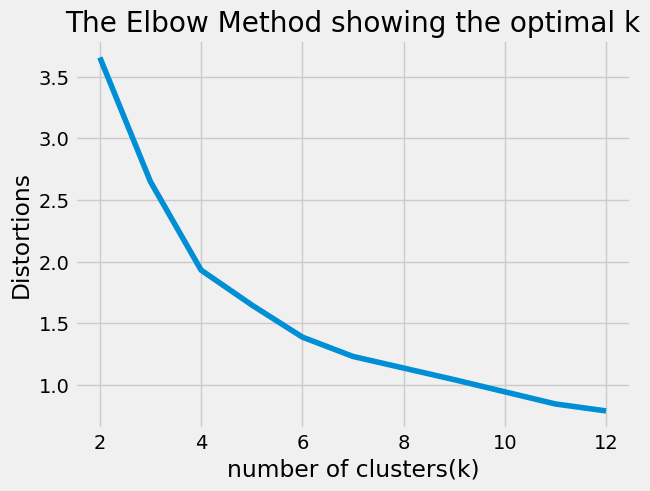

In [ ]:
# plotting elbow curve for optimal k value (inertia vs no. of clusters)
plt.plot(labels_temp, distortions)
plt.xlabel('number of clusters(k)')
plt.ylabel('Distortions')
plt.title('The Elbow Method showing the optimal k')
plt.show()

choosing the k value has 4.

In [ ]:
n_clusters=4
clusterer = KMeans(n_clusters, random_state =10)
cluster_labels = clusterer.fit_predict(pca_result)
print(cluster_labels)

[1 3 3 3 3 3 3 1 1 3 3 3 3 3 3 2 2 2 2 1 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 1 1 1 3 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 2 2 2 0 2 2 0 2 0 0 0 0 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.cluster_centers_

array([[-0.20454513,  0.02282455, -0.01797721, -0.00160332,  0.00770118],
       [ 0.32296585,  0.00529403, -0.00293762,  0.00483349,  0.02644652],
       [ 0.03022207,  0.19598833,  0.00209168,  0.0037292 , -0.02532909],
       [ 0.00250719, -0.16826723,  0.02001379, -0.00389986, -0.00671408]])

In [ ]:
df['Cluster']= cluster_labels

In [ ]:
df["Cluster"].value_counts()

1    23
0    21
3    15
2    13
Name: Cluster, dtype: int64

In [ ]:
y_kmeans = kmeans.predict(pca_result)
kmeans.labels_

array([0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1,
       3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
# Validation
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_result,y_kmeans)
print("For n_clusters =", 3, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.3736305289419696


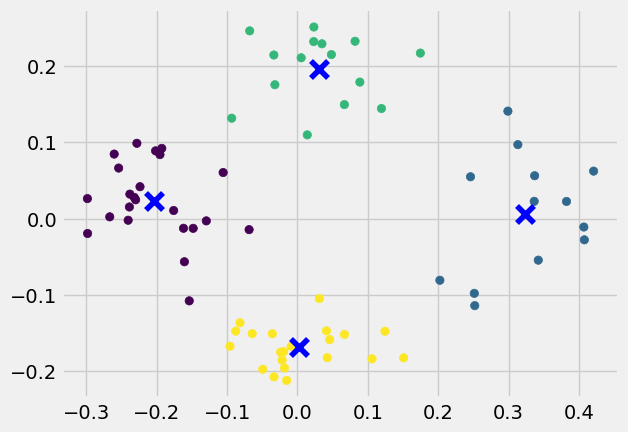

In [ ]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(pca_result)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmeans.predict(pca_result))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

**INFERENCE:** The clusters are formed using K-means clusters.